# Unidade II - Atividades de Aprendizagem Supervisionada
# Aula 02: Atividade de Teste
# Roteiro
 * Atividade de Teste

**Importação dos Dados**

In [1]:
import matplotlib.pylab as plt

%matplotlib inline 
plt.style.use('seaborn-whitegrid')
plt.rc('text', usetex=True)
plt.rc('font', family='times')
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.rc('font', size=12) 
plt.rc('figure', figsize = (12, 5))


In [2]:
import pickle
ofname = open('files/dataset_small.pkl','rb') 
(x,y) = pickle.load(ofname, encoding="bytes")

## 4. Teste

Até este ponto utilizamos dados de treinamento para "avaliar" o desempenho do classificador, mas esta é uma prática não recomendada. Vamos usar um subconjunto dos dados de treinamento para **testar** o desempenho do classificador.

**Dividindo o dataset em dois conjuntos de dados, de treinamento e de teste**

In [3]:
import numpy as np
perm = np.random.permutation(y.size)
PRC = 0.7
split_point = int(np.ceil(y.shape[0]*PRC))

X_train = x[perm[:split_point].ravel(),:]
y_train = y[perm[:split_point].ravel()]

X_test = x[perm[split_point:].ravel(),:]
y_test = y[perm[split_point:].ravel()]

print ('Dados de entrada do treinamento:' + str(X_train.shape), ', resposta do treinamento: '+str(y_train.shape))
print ('Dados de entrada do teste:' + str(X_test.shape), ' , resposta do teste: '+str(y_test.shape))

Dados de entrada do treinamento:(2898, 15) , resposta do treinamento: (2898,)
Dados de entrada do teste:(1242, 15)  , resposta do teste: (1242,)


In [4]:
#Treinar o classificador com os dados de treinamento
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

#Visualizar o desempenho
yhat=knn.predict(X_train)

from sklearn import metrics
print ("\nESTATÍSTICA DO TREINAMENTO:")
print ("Acurácia:", metrics.accuracy_score(yhat, y_train))
print ("Precision:", metrics.precision_score(yhat, y_train))
print ("Recall:", metrics.recall_score(yhat, y_train))
print ("F1-score:", metrics.f1_score(yhat, y_train))
print ("Matriz de confusão: \n"+ str(metrics.confusion_matrix(y_train, yhat)))


ESTATÍSTICA DO TREINAMENTO:
Acurácia: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
Matriz de confusão: 
[[2355    0]
 [   0  543]]


In [5]:
#Analisar com os dados de teste
yhat=knn.predict(X_test)
print ("ESTATÍSTICAS DO TESTE:")
print ("Acurácia:", metrics.accuracy_score(yhat, y_test))
print ("Precision:", metrics.precision_score(yhat, y_test))
print ("Recall:", metrics.recall_score(yhat, y_test))
print ("F1-score:", metrics.f1_score(yhat, y_test))
print ("Matriz de confusão: \n"+ str(metrics.confusion_matrix(yhat,y_test)))

ESTATÍSTICAS DO TESTE:
Acurácia: 0.7616747181964574
Precision: 0.36363636363636365
Recall: 0.3389830508474576
F1-score: 0.3508771929824561
Matriz de confusão: 
[[866 140]
 [156  80]]


**É possível automatizar esse processo, com as ferramentas fornecidas pelo pacote scikit-learn**

In [6]:
#Divisão feita com os pacotes fornecidos pelo pacote sklearn:
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn import metrics

PRC = 0.3
acc = np.zeros((10,))
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=PRC)
    knn = neighbors.KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_train,y_train)
    yhat = knn.predict(X_test)
    acc[i] = metrics.accuracy_score(yhat, y_test)
acc.shape=(1,10)
print ("Erro médio: "+str(np.mean(acc[0])))

Erro médio: 0.752415458937198


Nós podemos usar o processo de validação para a seleção do algoritmo de AM.

Vamos analisar o desempenho de quatro classificadores diferentes sobre o mesmo conjunto de dados.

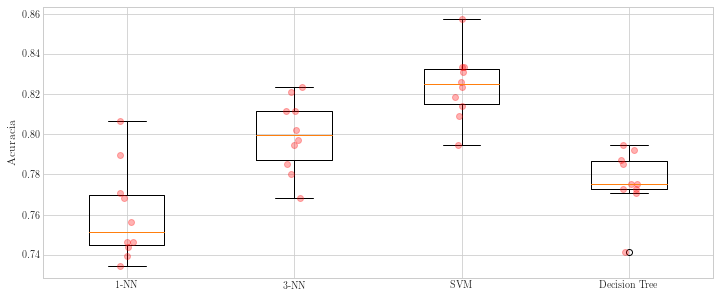

In [7]:
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn import tree
from sklearn import svm
from sklearn import metrics

PRC = 0.1
acc_r=np.zeros((10,4))
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=PRC)
    nn1 = neighbors.KNeighborsClassifier(n_neighbors=1)
    nn3 = neighbors.KNeighborsClassifier(n_neighbors=3)
    svc = svm.SVC()
    dt = tree.DecisionTreeClassifier()
    
    nn1.fit(X_train,y_train)
    nn3.fit(X_train,y_train)
    svc.fit(X_train,y_train)
    dt.fit(X_train,y_train)
    
    yhat_nn1=nn1.predict(X_test)
    yhat_nn3=nn3.predict(X_test)
    yhat_svc=svc.predict(X_test)
    yhat_dt=dt.predict(X_test)
    
    acc_r[i][0] = metrics.accuracy_score(yhat_nn1, y_test)
    acc_r[i][1] = metrics.accuracy_score(yhat_nn3, y_test)
    acc_r[i][2] = metrics.accuracy_score(yhat_svc, y_test)
    acc_r[i][3] = metrics.accuracy_score(yhat_dt, y_test)


plt.boxplot(acc_r);
for i in range(4):
    xderiv = (i+1)*np.ones(acc_r[:,i].shape)+(np.random.rand(10,)-0.5)*0.1
    plt.plot(xderiv,acc_r[:,i],'ro',alpha=0.3)
    
ax = plt.gca()
ax.set_xticklabels(['1-NN','3-NN','SVM','Decision Tree'])
plt.ylabel('Acuracia')
plt.savefig("plots/error_ms_1.png",dpi=300, bbox_inches='tight')